In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches


In [3]:
import os

directory_path = r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Project 1"
files = os.listdir(directory_path)
print(files)

['Olympics_Analysis.ipynb', 'Summer-Olympic-medals-1976-to-2008.csv']


In [4]:
file_path = r"C:\Users\alabi\OneDrive\Desktop\Coding Class\Challenges\Project 1\Summer-Olympic-medals-1976-to-2008.csv"




In [5]:
try:
    df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    print("Failed to read with 'latin1' encoding. Trying 'iso-8859-1'.")
    try:
        df = pd.read_csv(file_path, encoding='iso-8859-1')
    except UnicodeDecodeError:
        print("Failed to read with 'iso-8859-1' encoding. Trying 'cp1252'.")
        try:
            df = pd.read_csv(file_path, encoding='cp1252')
        except UnicodeDecodeError:
            print("Failed to read with 'cp1252' encoding. Please check the file encoding.")

# Display the first few rows of the DataFrame if successfully read
if 'df' in locals():
    print(df.head())

       City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze  


In [6]:
df.count()

City            15316
Year            15316
Sport           15316
Discipline      15316
Event           15316
Athlete         15316
Gender          15316
Country_Code    15316
Country         15316
Event_gender    15316
Medal           15316
dtype: int64

In [7]:
df = df.dropna(how='any')

In [8]:
df.count()

City            15316
Year            15316
Sport           15316
Discipline      15316
Event           15316
Athlete         15316
Gender          15316
Country_Code    15316
Country         15316
Event_gender    15316
Medal           15316
dtype: int64

In [9]:
df.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [10]:
df['Year'] = df['Year'].astype(int)

In [11]:
print(df.dtypes)
print(df)

City            object
Year             int32
Sport           object
Discipline      object
Event           object
Athlete         object
Gender          object
Country_Code    object
Country         object
Event_gender    object
Medal           object
dtype: object
           City  Year      Sport       Discipline           Event  \
0      Montreal  1976   Aquatics           Diving  3m springboard   
1      Montreal  1976   Aquatics           Diving  3m springboard   
2      Montreal  1976   Aquatics           Diving  3m springboard   
3      Montreal  1976   Aquatics           Diving  3m springboard   
4      Montreal  1976   Aquatics           Diving    10m platform   
...         ...   ...        ...              ...             ...   
15428   Beijing  2008  Wrestling  Wrestling Gre-R       66 - 74kg   
15429   Beijing  2008  Wrestling  Wrestling Gre-R       66 - 74kg   
15430   Beijing  2008  Wrestling  Wrestling Gre-R       55 - 60kg   
15431   Beijing  2008  Wrestling  Wrestling

In [12]:
Total_Medals_country = df[df.Medal.isin(['Gold', 'Silver', 'Bronze'])].groupby(['Country']).Medal.size()

In [13]:
Total_Medals_country_top_10 = Total_Medals_country.sort_values(ascending = False)[:10]
print(Total_Medals_country_top_10)

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: Medal, dtype: int64


Text(0, 0.5, 'Total Medals')

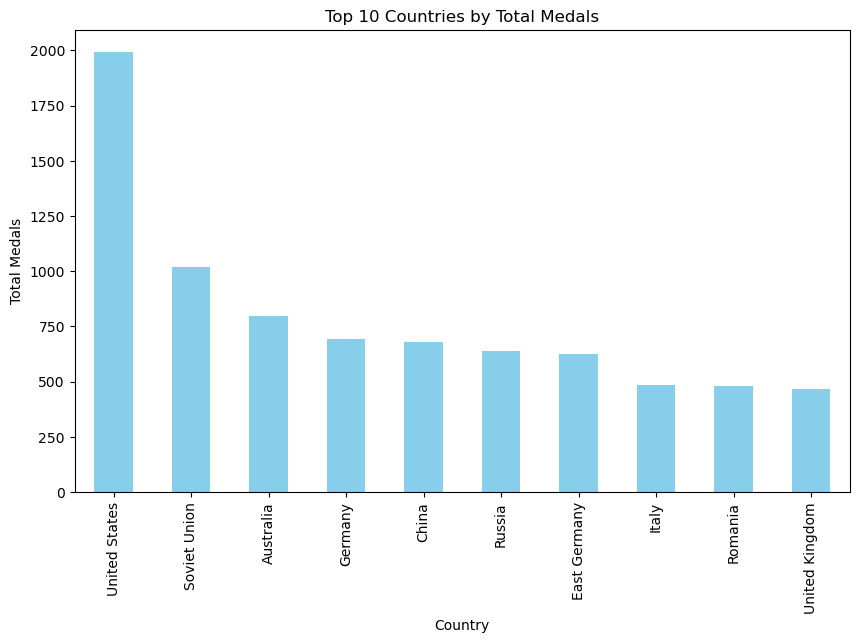

In [14]:
plt.figure(figsize=(10, 6))
Total_Medals_country_top_10.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')

In [15]:
Gold_Medals_country = df[df.Medal =='Gold'].groupby(['Country']).Medal.size()

In [16]:
Gold_Medals_country_top_10 = Gold_Medals_country.sort_values(ascending = False)[:10]
print(Gold_Medals_country_top_10)

Country
United States    928
Soviet Union     439
East Germany     286
Germany          237
China            234
Australia        216
Russia           192
France           154
Cuba             152
Italy            145
Name: Medal, dtype: int64


Text(0, 0.5, 'Gold Medals')

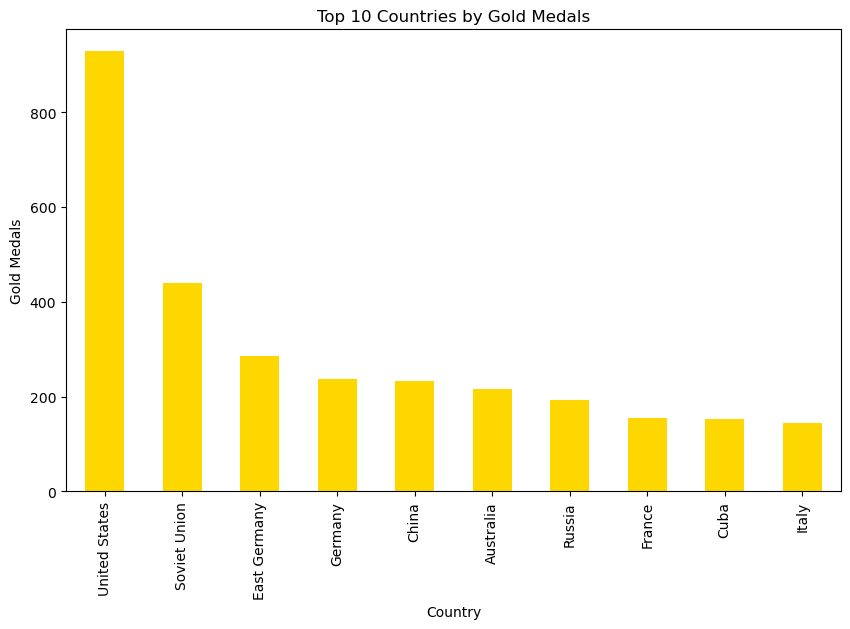

In [17]:
plt.figure(figsize=(10, 6))
Gold_Medals_country_top_10.plot(kind='bar', color='gold')
plt.title('Top 10 Countries by Gold Medals')
plt.xlabel('Country')
plt.ylabel('Gold Medals')

In [18]:
medals_pivot = df.pivot_table(index='Country', columns='Year', values='Medal', aggfunc='count')
total_medals_timeseries = medals_pivot.sum(axis=1)
top_7_countries_timeseries = total_medals_timeseries.sort_values(ascending=False).head(7).index
top_7_medals_pivot = medals_pivot.loc[top_7_countries_timeseries]
print(top_7_medals_pivot)

Year            1976   1980   1984   1988   1992   1996   2000   2004   2008
Country                                                                     
United States  155.0    NaN  333.0  193.0  224.0  260.0  248.0  264.0  315.0
Soviet Union   285.0  442.0    NaN  294.0    NaN    NaN    NaN    NaN    NaN
Australia       24.0   12.0   50.0   34.0   57.0  132.0  183.0  157.0  149.0
Germany          NaN    NaN    NaN    NaN  198.0  124.0  119.0  149.0  101.0
China            NaN    NaN   76.0   53.0   83.0  110.0   79.0   94.0  184.0
Russia           NaN    NaN    NaN    NaN    NaN  115.0  188.0  192.0  143.0
East Germany   192.0  260.0    NaN  174.0    NaN    NaN    NaN    NaN    NaN


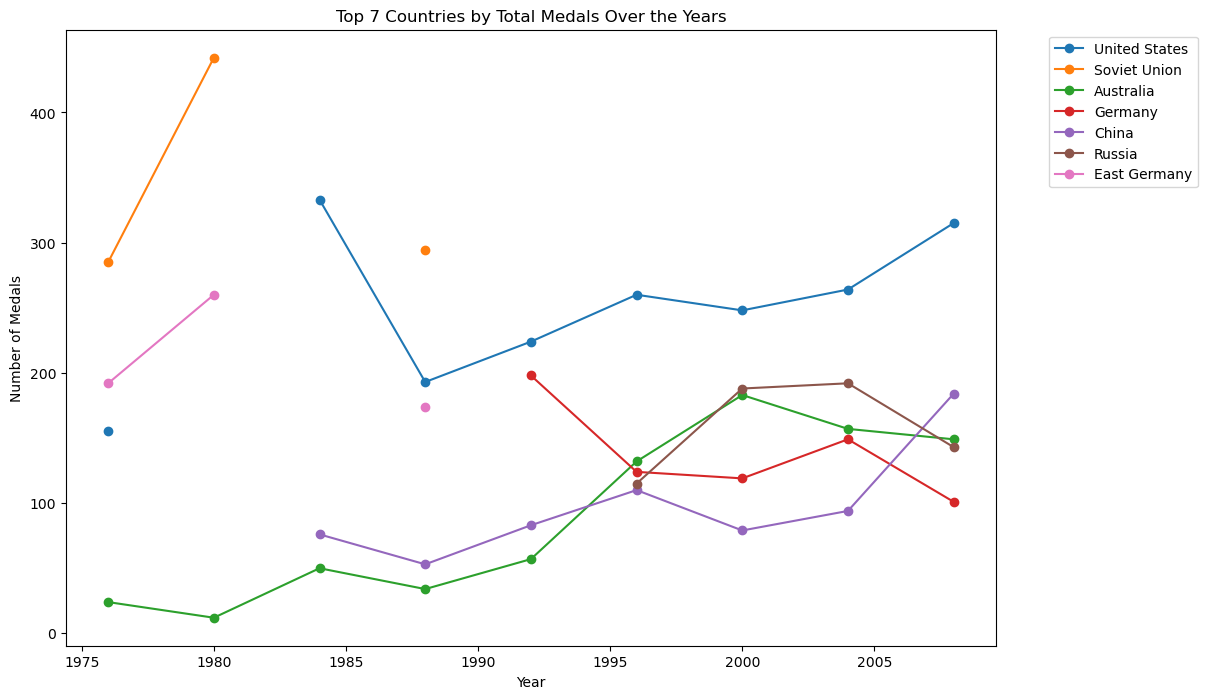

In [19]:
plt.figure(figsize=(12, 8))
Years = top_7_medals_pivot.columns
for country in top_7_medals_pivot.index:
    plt.plot(
        Years,        # Years on the x-axis
        top_7_medals_pivot.loc[country],   # Medal counts on the y-axis
        marker='o',                         # Marker style (e.g., 'o' for circle)
        label=country                       # Label each line with the country name
    )

# Adding titles and labels
plt.title('Top 7 Countries by Total Medals Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Country')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [20]:
# Calculate the number of unique female athletes per year
female_athletes_per_year = df.groupby('Year')['Athlete'].nunique().reset_index()

# Rename columns for clarity
female_athletes_per_year.columns = ['Year', 'Number of Female Athletes']

In [21]:
female_athletes_per_year

,Year,Number of Female Athletes
0,1976,1179
1,1980,1257
2,1984,1309
3,1988,1371
4,1992,1537
5,1996,1709
6,2000,1849
7,2004,1832
8,2008,1866


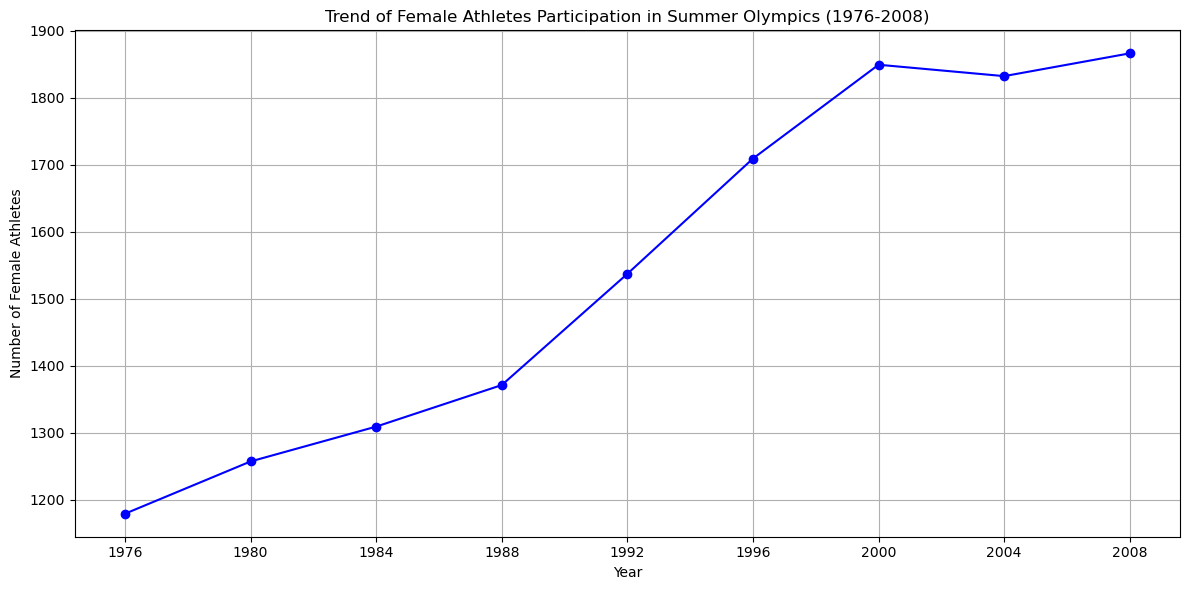

In [22]:
# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(
    female_athletes_per_year['Year'],
    female_athletes_per_year['Number of Female Athletes'],
    marker='o',
    linestyle='-',
    color='b'
)
plt.title('Trend of Female Athletes Participation in Summer Olympics (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(female_athletes_per_year['Year'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Filter the df for female athletes
female_athletes_df = df[df['Gender'] == 'Women']

# Group the df by Year and Sport and count unique athletes
female_athletes_by_sport = (
    female_athletes_df.groupby(['Year', 'Sport'])['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_sport.columns = ['Year', 'Sport', 'Number of Female Athletes']

In [24]:
female_athletes_by_sport

,Year,Sport,Number of Female Athletes
0,1976,Aquatics,38
1,1976,Archery,3
2,1976,Athletics,51
3,1976,Basketball,36
4,1976,Canoe / Kayak,7
...,...,...,...
167,2008,Tennis,9
168,2008,Triathlon,3
169,2008,Volleyball,42
170,2008,Weightlifting,21


<Figure size 1400x800 with 0 Axes>

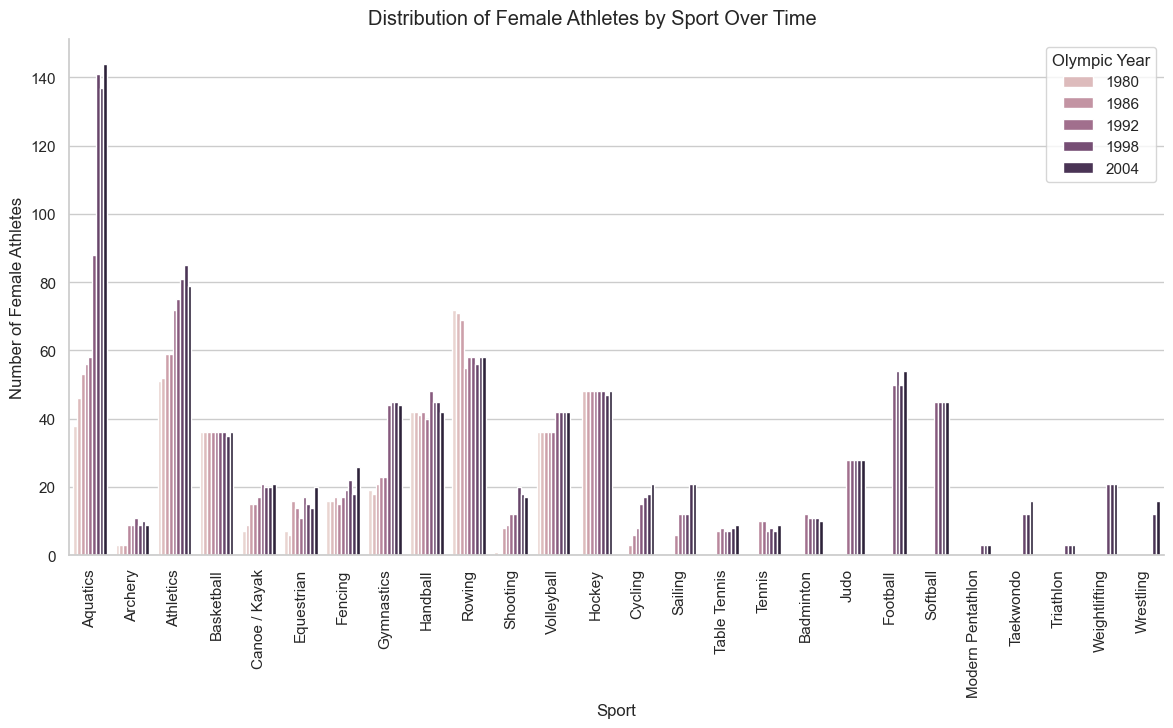

In [25]:
# Plotting the distribution over time for selected years
plt.figure(figsize=(14, 8))

# Using seaborn to create a bar plot
sns.set(style="whitegrid")
g = sns.catplot(
    data=female_athletes_by_sport,
    x='Sport',
    y='Number of Female Athletes',
    hue='Year',
    kind='bar',
    height=6,
    aspect=2,
    legend_out=False
)

# Rotate x labels for better readability
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Female Athletes by Sport Over Time', y=1.02)
g.set_axis_labels('Sport', 'Number of Female Athletes')
g.add_legend(title='Olympic Year')

# Show the plot
plt.show()

In [26]:
# Filter the df for female athletes
female_medals_df = df[df['Gender'] == 'Women']

# Group the df by Year and Medal type and count medals
medals_by_year = (
    female_medals_df.groupby(['Year', 'Medal'])['Athlete']
    .count()
    .unstack(fill_value=0)
    .reset_index()
)

# Rename columns for clarity
medals_by_year.columns = ['Year', 'Bronze', 'Gold', 'Silver']

In [27]:
medals_by_year

,Year,Bronze,Gold,Silver
0,1976,126,127,128
1,1980,144,143,142
2,1984,162,163,161
3,1988,183,172,180
4,1992,205,200,195
5,1996,260,259,258
6,2000,299,293,297
7,2004,303,298,298
8,2008,319,307,306


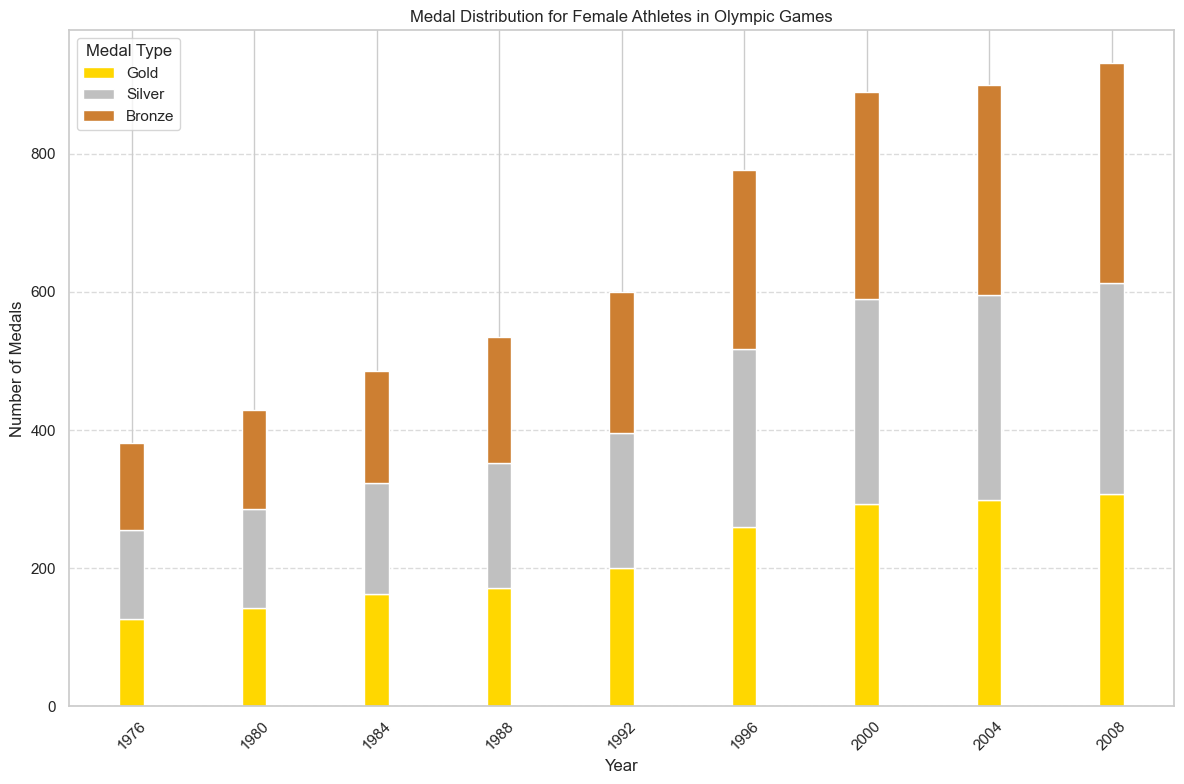

In [28]:
# Plotting the medal distribution over time
plt.figure(figsize=(12, 8))

# Stacked bar plot
plt.bar(medals_by_year['Year'], medals_by_year['Gold'], color='gold', label='Gold')
plt.bar(medals_by_year['Year'], medals_by_year['Silver'], bottom=medals_by_year['Gold'], color='silver', label='Silver')
plt.bar(medals_by_year['Year'], medals_by_year['Bronze'], bottom=medals_by_year['Gold'] + medals_by_year['Silver'], color='#cd7f32', label='Bronze')

# Adding title and labels
plt.title('Medal Distribution for Female Athletes in Olympic Games')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(medals_by_year['Year'], rotation=45)
plt.legend(title='Medal Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Filter the df for female athletes in Summer Olympics
female_athletes_df = df[(df['Gender'] == 'Women')]

# Group the df by Country and Year and count unique athletes
female_athletes_by_country = (
    female_athletes_df.groupby(['Country', 'Year'])['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_country.columns = ['Country', 'Year', 'Number of Female Athletes']

# Find the top countries with the highest number of female athletes
top_countries = (
    female_athletes_by_country.groupby('Country')['Number of Female Athletes']
    .sum()
    .nlargest(10)
    .index
)

# Filter the df to include only the top countries
top_countries_df = female_athletes_by_country[female_athletes_by_country['Country'].isin(top_countries)]
top_countries_df

,Country,Year,Number of Female Athletes
7,Australia,1980,1
8,Australia,1984,11
9,Australia,1988,21
10,Australia,1992,10
11,Australia,1996,68
...,...,...,...
323,United States,1992,79
324,United States,1996,109
325,United States,2000,115
326,United States,2004,126


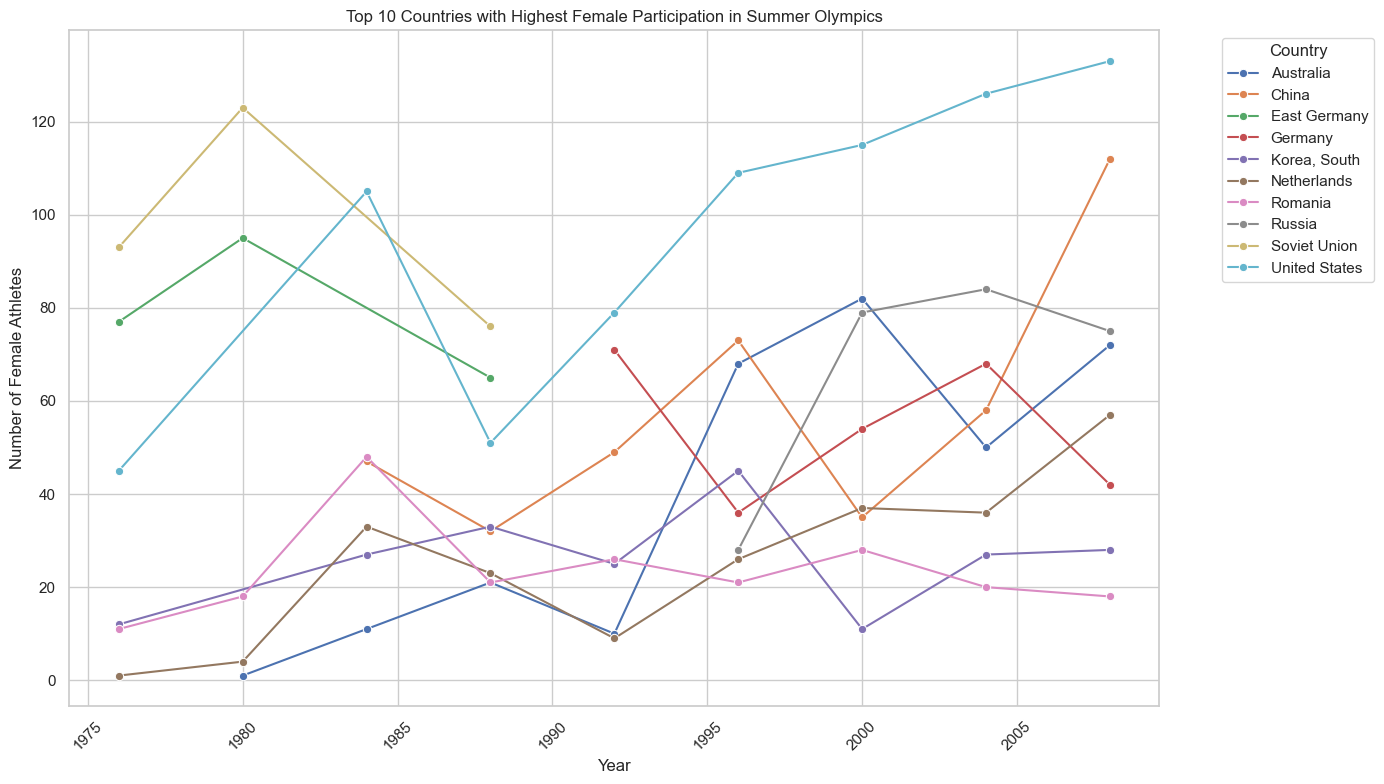

In [30]:
# Plotting the participation over time for top countries
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Using seaborn to create a line plot
sns.lineplot(
    data=top_countries_df,
    x='Year',
    y='Number of Female Athletes',
    hue='Country',
    marker='o'
)

# Adding title and labels
plt.title('Top 10 Countries with Highest Female Participation in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

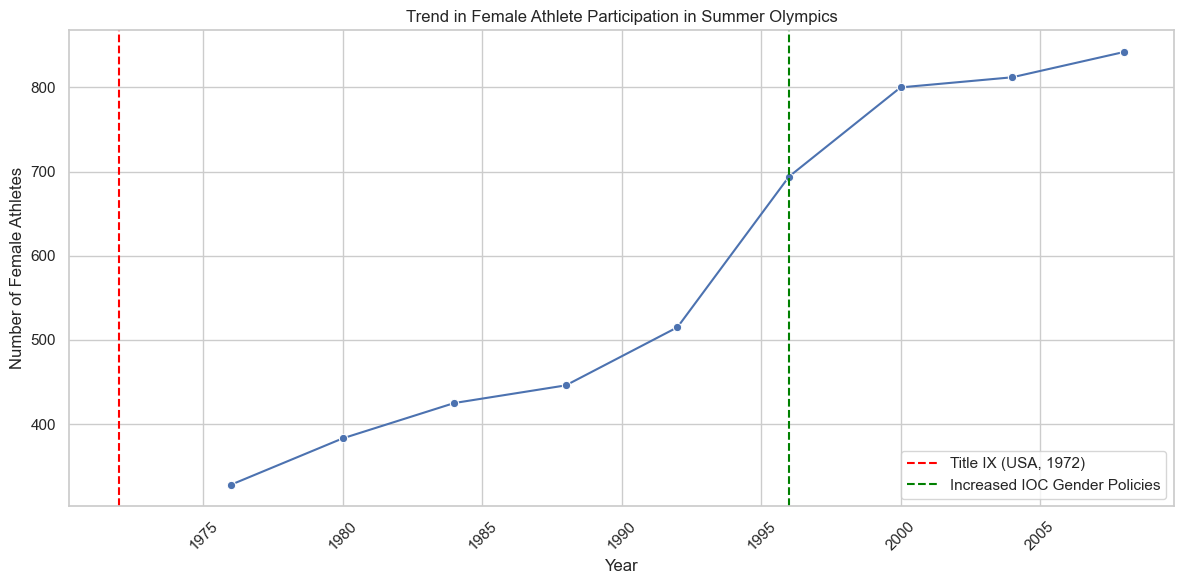

In [31]:
# Group the df by Year and count unique athletes
female_athletes_by_year = (
    female_athletes_df.groupby('Year')['Athlete']
    .nunique()
    .reset_index()
)

# Rename columns for clarity
female_athletes_by_year.columns = ['Year', 'Number of Female Athletes']

# Plotting the overall trend in female participation over time
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Using seaborn to create a line plot
sns.lineplot(
    data=female_athletes_by_year,
    x='Year',
    y='Number of Female Athletes',
    marker='o'
)

# Highlighting key policy changes
plt.axvline(x=1972, color='red', linestyle='--', label='Title IX (USA, 1972)')
plt.axvline(x=1996, color='green', linestyle='--', label='Increased IOC Gender Policies')

# Adding title and labels
plt.title('Trend in Female Athlete Participation in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
df_rivalry = df
df_rivalry['Country'] = df_rivalry['Country'].replace('Soviet Union', 'Russia')

In [34]:
filtered_df = df_rivalry[(df_rivalry['Country_Code'].isin(['RUS', 'USA'])) | (df_rivalry['Country'].isin(['Russia', 'United States']))]

In [35]:
filtered_df['Country']

1               Russia
2        United States
4        United States
5        United States
6               Russia
             ...      
15411           Russia
15413           Russia
15420    United States
15422           Russia
15427           Russia
Name: Country, Length: 3651, dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int32 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int32(1), object(10)
memory usage: 1.3+ MB


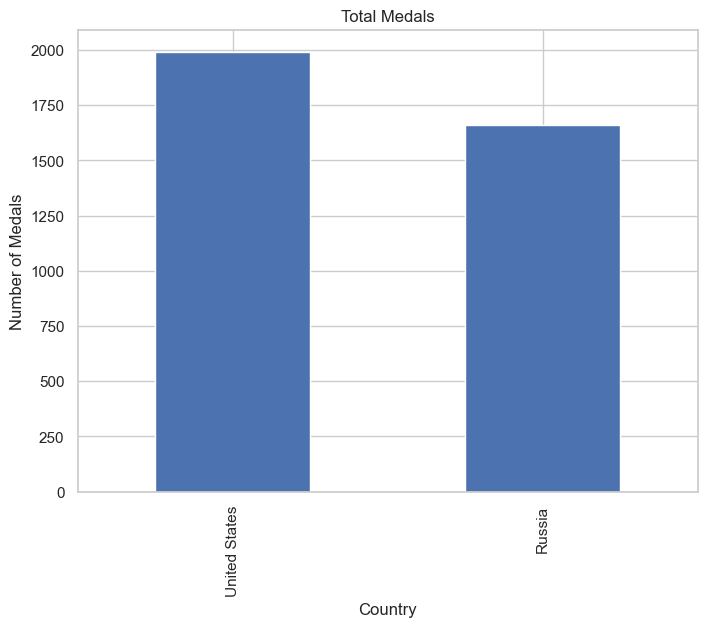

In [37]:
# Total Medals
total_medals = filtered_df['Country'].value_counts()

# Bar Chart
plt.figure(figsize=(8, 6))
total_medals.plot(kind='bar')
plt.title('Total Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.show()

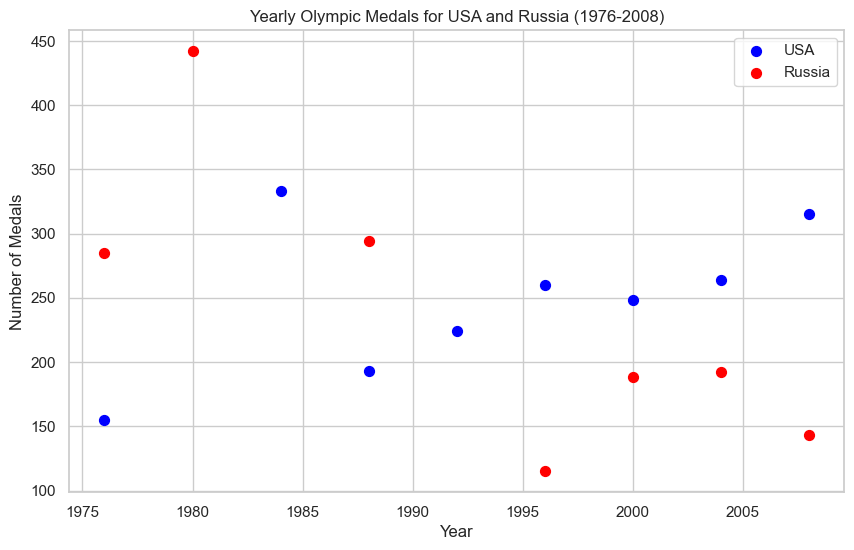

In [38]:
# Scatter Chart to Show Yearly Changes for Two Countries
plt.figure(figsize=(10, 6))

# Plotting for USA
usa_data = filtered_df[filtered_df['Country'] == 'United States'].groupby('Year').size().reset_index(name='Medals')
plt.scatter(usa_data['Year'], usa_data['Medals'], color='blue', label='USA', s=50)

# Plotting for Russia
russia_data = filtered_df[filtered_df['Country'].str.contains('Russia|Soviet Union')].groupby('Year').size().reset_index(name='Medals')
plt.scatter(russia_data['Year'], russia_data['Medals'], color='red', label='Russia', s=50)

# Chart details
plt.title('Yearly Olympic Medals for USA and Russia (1976-2008)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x800 with 0 Axes>

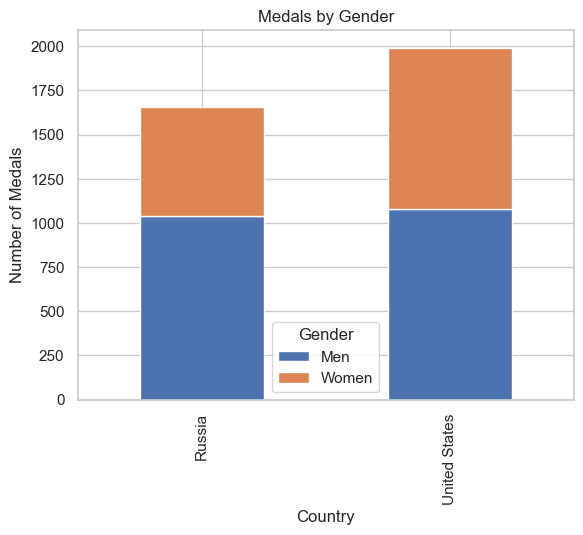

In [39]:
# Medals by Gender
medals_by_gender = filtered_df.groupby(['Country', 'Gender']).size().unstack(fill_value=0)

# Stacked Bar Chart
plt.figure(figsize=(10, 8))
medals_by_gender.plot(kind='bar', stacked=True)
plt.title('Medals by Gender')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Gender')
plt.show()

<Figure size 1200x800 with 0 Axes>

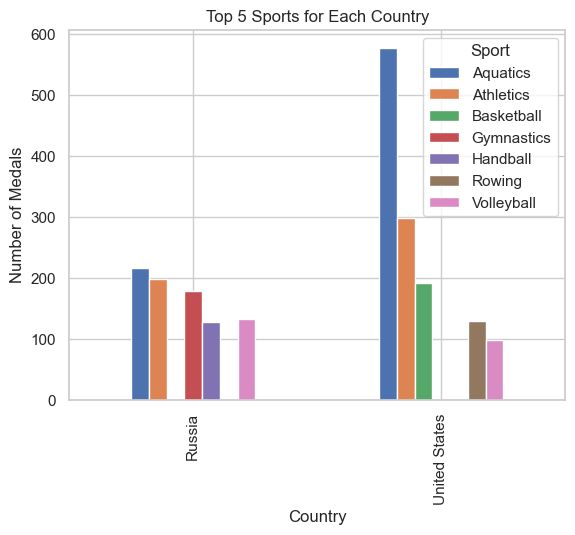

In [40]:
# Top 5 Sports for Each Country
top_sports = filtered_df.groupby(['Country', 'Sport']).size().unstack(fill_value=0)
top_sports = top_sports.apply(lambda x: x.nlargest(5), axis=1)

# Bar Chart
plt.figure(figsize=(12, 8))
top_sports.plot(kind='bar')
plt.title('Top 5 Sports for Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.legend(title='Sport')
plt.show()

<Figure size 1000x800 with 0 Axes>

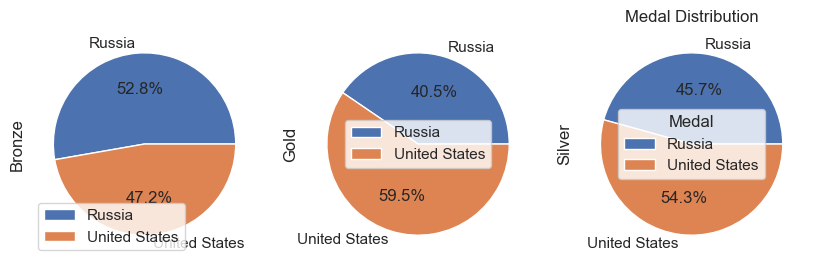

In [41]:
# Medal Distribution
medal_distribution = filtered_df.groupby(['Country', 'Medal']).size().unstack(fill_value=0)

# Pie Chart
plt.figure(figsize=(10, 8))
medal_distribution.plot(kind='pie', subplots=True, figsize=(10, 8), autopct='%1.1f%%')
plt.title('Medal Distribution')
plt.legend(title='Medal')
plt.show()